# **The Sparks Foundation GRIP Task-1**

## Prediction Using Supervised Machine Learning

### Author: Shreeya Shah

### Objective: To predict the percentage of an student based on the no. of study hours and tell what will be the predicted score if a student studies for 9.25 Hours/Day

**First we will import the required libraries**

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Reading the data**

In [5]:
data = pd.read_csv("http://bit.ly/w-data")

In [6]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Let's look at the summary of the data**

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

### Distribution Plot

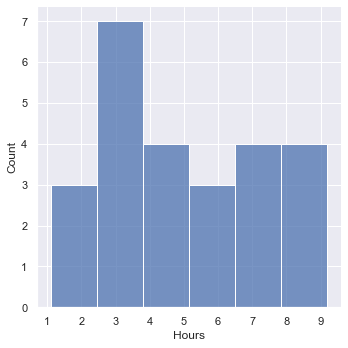

In [11]:
sns.displot(data["Hours"])

We can imply from the plot that the distribution of data includes no outliers.

**Checking for null values**

In [12]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in the dataset.

## Data Visualisation

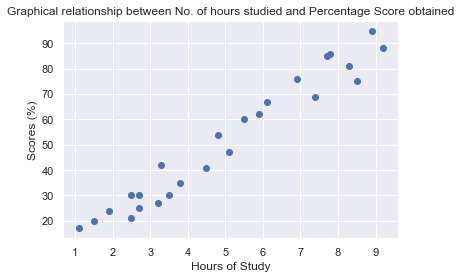

In [13]:
plt.scatter(data['Hours'],data['Scores'])
plt.title('Graphical relationship between No. of hours studied and Percentage Score obtained')
plt.xlabel('Hours of Study')
plt.ylabel('Scores (%)')
plt.show()

There's strong positive linear relationship between No. of study of hours and the scores obtained.

## Specifying the model

In [14]:
y= data['Scores']  #dependent variable
x= data['Hours']   #independent variable

In [15]:
# Training and testing data
y_train, y_test, x_train, x_test = train_test_split(y,x, test_size = 0.2, random_state = 42)

# Fitting the linear regresion line
x = sm.add_constant(x_train)
linear_regression_model = sm.OLS(y_train,x).fit()

**Summary of linear regression**

In [16]:
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     335.8
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           4.34e-13
Time:                        20:15:36   Log-Likelihood:                -62.864
No. Observations:                  20   AIC:                             129.7
Df Residuals:                      18   BIC:                             131.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8269      2.935      0.963      0.348      -3.340       8.994
Hours          9.6821      0.528     18.324      0.000       8.572      10.792
==============================================================================
Omnibus:                        7.043   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                1.821
Skew:                          -0.134   Prob(JB):                        0.402
Kurtosis:                       1.546   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It can be concluded from the high values of R-squared and adjusted R-squared that number of hours studied is highly significant in explaining the variation in scores.

**Scatter Plot of Regression Line**

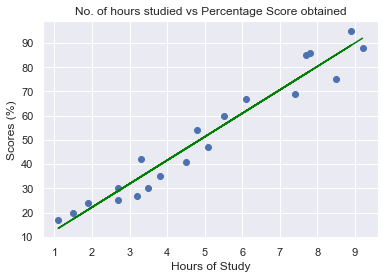

In [18]:
plt.scatter(x_train,y_train)
y_hat = x_train*9.6821 + 2.8269
plt.plot(x_train, y_hat, c = "Green")
plt.title("No. of hours studied vs Percentage Score obtained")
plt.xlabel('Hours of Study')
plt.ylabel('Scores (%)')
plt.show()

**Testing**

In [19]:
df = pd.DataFrame({"Constant":1,"Hours of Study": x_test})
prediction = linear_regression_model.predict(df)
Results = pd.DataFrame({"Actual Score": y_test,"Predicted Score": prediction})
print("Results")
Results = Results.reset_index(drop=True)
Results

Results


,Actual Score,Predicted Score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


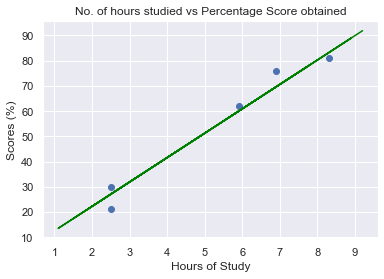

In [20]:
plt.scatter(x_test,y_test)
y_hat = x_train*9.6821 + 2.8269
plt.plot(x_train, y_hat, c = "Green")
plt.title("No. of hours studied vs Percentage Score obtained")
plt.xlabel('Hours of Study')
plt.ylabel('Scores (%)')
plt.show()

**Prediction**

In [21]:
y = linear_regression_model.predict([1,9.25])
df = pd.DataFrame([9.25], columns = ["Hours of Study/Day"])
df["Predicted Score"] = y
df

,Hours of Study/Day,Predicted Score
0,9.25,92.386115


**Conclusion: If a student studies 9.25 hours a day, his predicted score is 92.386**